In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import sys

sys.path.append("../scripts")
from LSTM import PortfolioPredicitionsLSTM_volatility
from LSTM_utils import compute_errors_volatility

# Import des données

In [2]:
titres = {"Amazon": pd.read_csv("../data/AMZN.csv"),
          "Berkshire": pd.read_csv("../data/BRK-B.csv"),
          "Google": pd.read_csv("../data/GOOG.csv"),
          "Microsoft": pd.read_csv("../data/MSFT.csv"),
          "Exxon": pd.read_csv("../data/XOM.csv")}

# Modélisation

In [3]:
LSTM = PortfolioPredicitionsLSTM_volatility(titres, 
                                            n_steps = 30, 
                                            epochs = 50, 
                                            horizon_prev = 14, 
                                            test_size = 0.8)

In [4]:
predictions, ptf_avg = LSTM.predict_avg_portfolio()

100%|██████████| 5/5 [06:23<00:00, 76.66s/it]


# Résultats

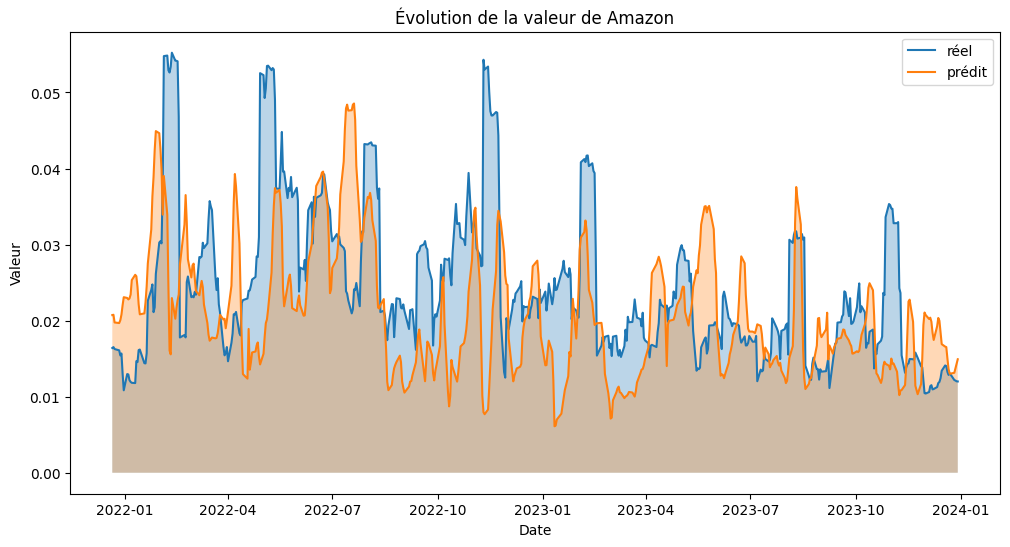

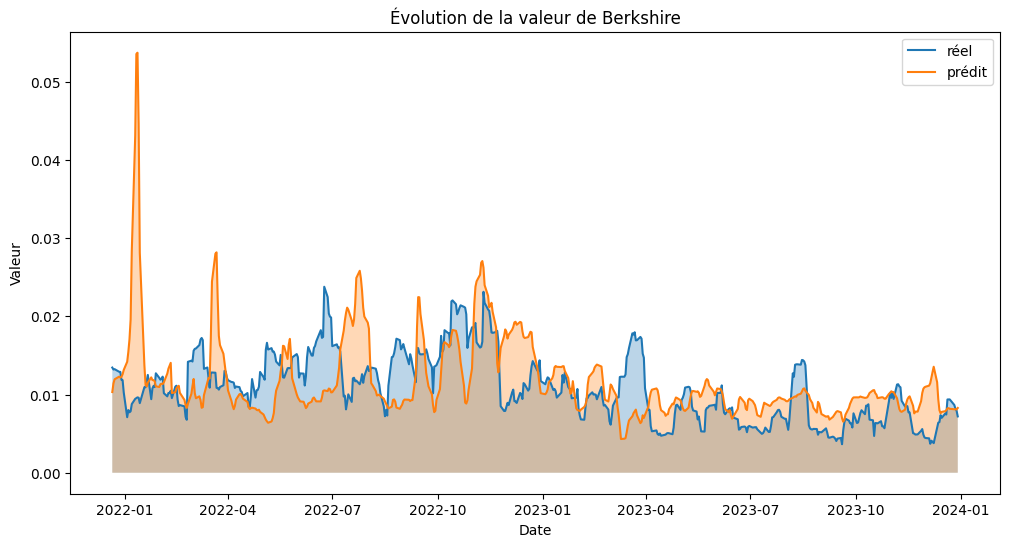

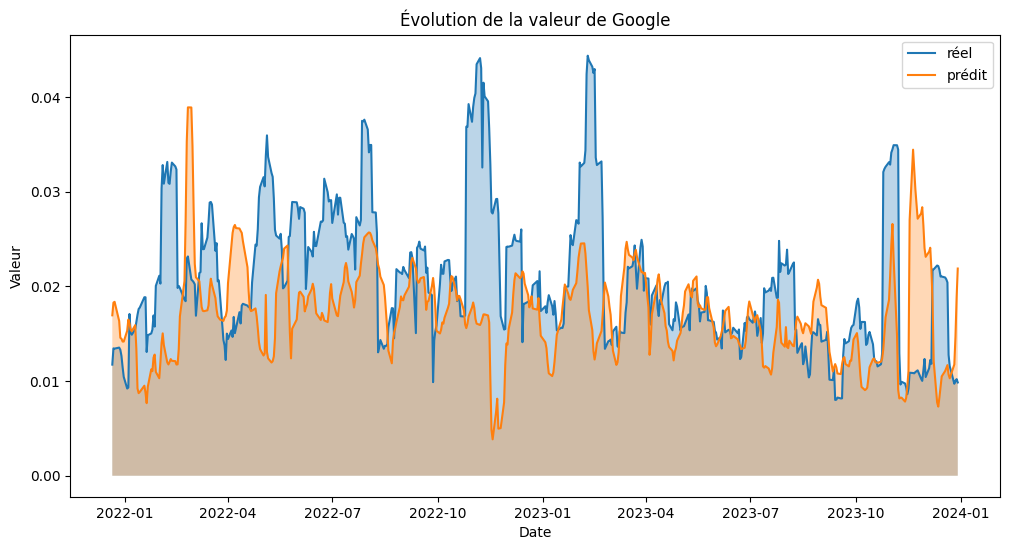

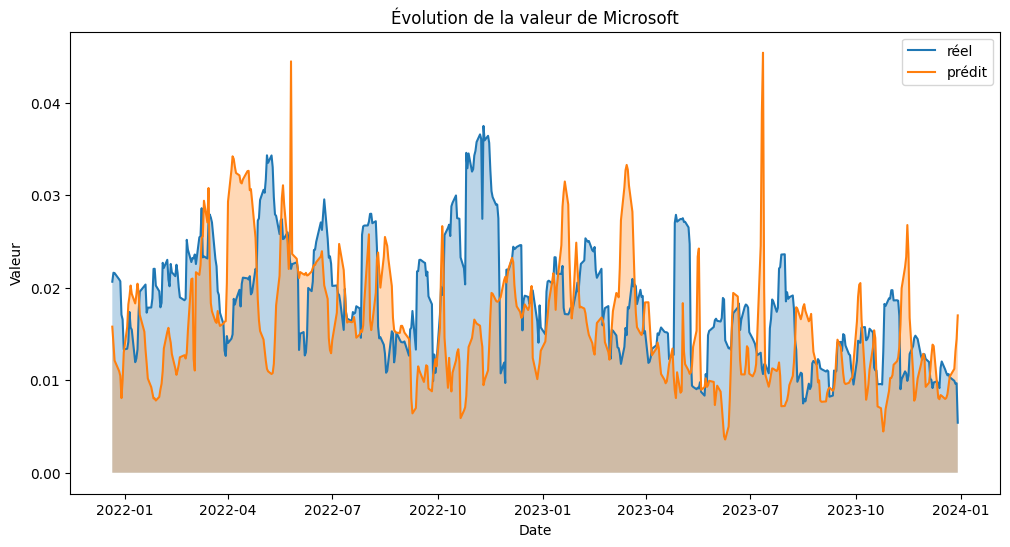

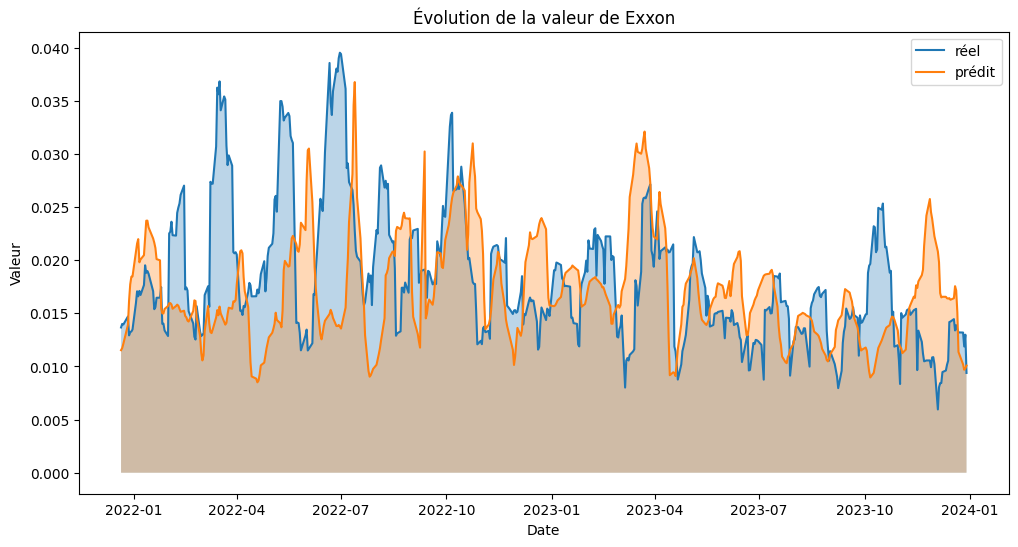

In [9]:
for key, value in predictions.items() :
    fig = plt.figure(figsize=(12,6))
    plt.plot(value.Date, value['Volatility'], label='réel')
    plt.fill_between(value.Date, value['Volatility'], alpha=0.3)
    
    # Plot the 'Prediction' values
    plt.plot(value.Date, value['Prediction'], label='prédit')
    plt.fill_between(value.Date, value['Prediction'], alpha=0.3)
    
    # Set the title and axis labels
    plt.title(f"Évolution de la valeur de {key}")
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

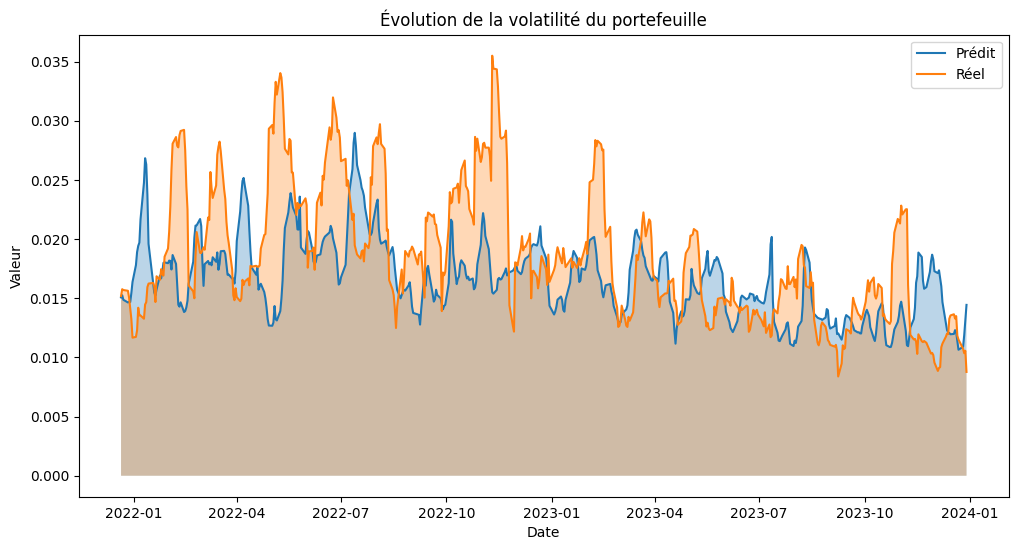

In [10]:
fig = plt.figure(figsize=(12, 6))

plt.plot(ptf_avg.Date, ptf_avg['Prediction'], label='Prédit')
plt.fill_between(ptf_avg.Date, ptf_avg['Prediction'], alpha=0.3)

plt.plot(ptf_avg.Date, ptf_avg['Volatility'], label='Réel')
plt.fill_between(ptf_avg.Date, ptf_avg['Volatility'], alpha=0.3)

plt.title(f"Évolution de la volatilité du portefeuille")
plt.xlabel('Date')
plt.ylabel('Valeur')

plt.legend()
plt.show()

# Erreurs

In [7]:
errors = compute_errors_volatility(predictions, ptf_avg)

In [8]:
errors

,MSE,RMSE,MAE
Portfolio,0.000035,0.005920,0.004459
Amazon,0.000145,0.012040,0.009098
Berkshire,0.000038,0.006194,0.004219
Google,0.000088,0.009364,0.006772
Microsoft,0.000083,0.009124,0.007005
Exxon,0.000062,0.007851,0.005932
